Build a histogram of votes by SMD

In [1]:
import pandas as pd

In [2]:
results = pd.read_csv('../data/results.csv')
districts = pd.read_csv('../data/districts.csv')
votes_per_smd = pd.DataFrame(results.groupby('smd_id').votes.sum()).reset_index()

## Votes by Candidate

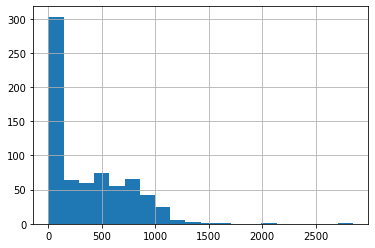

In [3]:
_ = results.votes.hist(bins=20)

In [4]:
results.votes.median()

256.5

## Votes by SMD

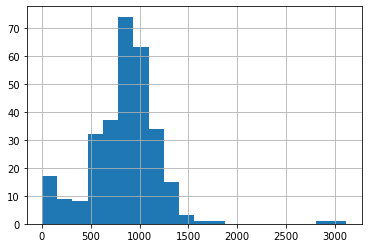

In [5]:
_ = votes_per_smd.votes.hist(bins=20)

In [6]:
votes_per_smd.votes.median()

875.5

## Votes by ANC

In [7]:
results_districts = pd.merge(results, districts, how='inner', on='smd_id')
votes_per_anc = results_districts.groupby('anc_id').agg(
    num_smds = ('smd_id', 'nunique')
    , total_votes = ('votes', 'sum')
)

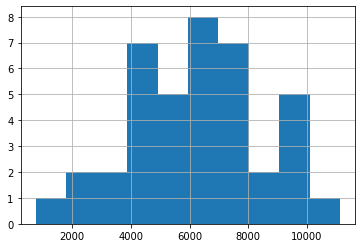

In [8]:
_ = votes_per_anc.total_votes.hist()

In [9]:
votes_per_anc.total_votes.median()

6204.0

## Votes by ANC, averaged by SMD

In [10]:
votes_per_anc['Average Votes per SMD'] = votes_per_anc['total_votes'] / votes_per_anc['num_smds']

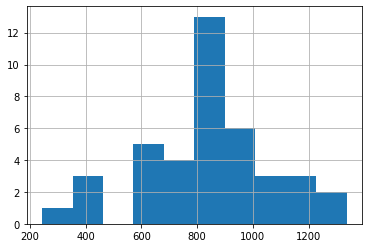

In [11]:
_ = votes_per_anc['Average Votes per SMD'].hist()

In [12]:
votes_per_anc['Average Votes per SMD'].median()

845.0714285714286

## Sanity Checks

In [13]:
votes_per_anc[['num_smds', 'total_votes']].sum()

num_smds          296
total_votes    250988
dtype: int64

In [14]:
votes_per_anc

,num_smds,total_votes,Average Votes per SMD
anc_id,,,
1A,12,8668,722.333333
1B,12,9762,813.500000
1C,8,7915,989.375000
1D,5,3966,793.200000
2A,8,1950,243.750000
2B,9,7510,834.444444
2C,3,1901,633.666667
2D,2,754,377.000000
2E,8,3663,457.875000


## Candidate Rankings

In [15]:
results['vote_rank'] = results['votes'].rank(method='min', ascending=False)

In [16]:
results.sort_values(by='votes', ascending=False).head(50)

,candidate_id,candidate_matched,candidate_name,dcboe_hash_id,smd_id,contest_number,name_from_results,votes,vote_share,ranking,winner,write_in_winner,margin_of_victory,margin_of_victory_percentage,num_candidates,total_votes,vote_rank
458,50190.0,1,Drew Courtney,014cac4dd905f3c85a0b269bf43a352ebe04c08b102b7a...,smd_6C06,229,Drew Courtney,2848,96.71%,1,True,False,2751.0,93.41%,2,2945,1.0
463,50196.0,1,Edward Daniels,e03a1c254580e46525a9b4d6ef204bab0f12b224588086...,smd_6D07,236,Edward Daniels,2053,65.89%,1,True,False,1068.0,34.27%,3,3116,2.0
608,50376.0,1,Patrick K. Parlej,826fafb76a69665a2585610f5f679c7a0fb1ec0de5548c...,smd_6E05,241,Patrick K. Parlej,1573,96.27%,1,True,False,1512.0,92.53%,2,1634,3.0
412,50139.0,1,Pierre Hines,d1b97aea73c2cbd2eecec59929bb5008ac235d0836e983...,smd_5C03,184,Pierre Hines,1467,96.32%,1,True,False,1411.0,92.65%,2,1523,4.0
457,50188.0,1,Joel Kelty,84edb33a0a2bed21dd3e52fbee27bae82485e5deaeaefc...,smd_6C05,228,Joel Kelty,1354,94.69%,1,True,False,1278.0,89.37%,2,1430,5.0
460,50193.0,1,Andy Litsky,e4d3a374dfcf85028220dbf0963ec9ff43e9e5121beecc...,smd_6D04,233,Andy Litsky,1316,96.13%,1,True,False,1263.0,92.26%,2,1369,6.0
574,50334.0,1,Geoff Bromaghim,74ddb5ca35a50e07e4dff3aea623bbc42a674759ea3584...,smd_4B07,150,Geoff Bromaghim,1242,95.54%,1,True,False,1184.0,91.08%,2,1300,7.0
450,50179.0,1,Corey Holman,1517ed5f34ee8200194cefac2d575ead1ecae8d2b3dc14...,smd_6B06,219,Corey Holman,1186,96.66%,1,True,False,1145.0,93.32%,2,1227,8.0
461,50194.0,1,"Fredrica ""Rikki"" Kramer",154de7e1905ffd769138b98f0df6b1de66c0554772b9b2...,smd_6D05,234,"Fredrica (""Rikki"") Kramer",1178,95.62%,1,True,False,1124.0,91.23%,2,1232,9.0
407,50134.0,1,Ra Amin,a36c6cd0011c818e5ca0cee688bc255fb40c2c517906c2...,smd_5B04,180,Ra Amin,1162,95.87%,1,True,False,1112.0,91.75%,2,1212,10.0
